#Curva ROC

Caracteristica operativa del receptor, es usada en el sector de aprendizaje automático para la comparación de modelos, se usa para generar estadísticos que resumen el rendimiento del clasificador.

En clasificación binaria hay cuatro posibles resultados para un clasificador, $VP$ los verdaderos positivos conocidos como los beneficios, $VN$, los verdaderos negativos , $FP$ los falsos positivos conocidos como costos y los $FN$ falsos negativos, con los cuales se organiza la llamada tabla de contingencia  o matriz de confusión. 

Esta curva es la representación grafica de la relación de verdaderos positivos, $(VPR)$ contra la relación de falsos negativos $(FPR)$, segun se varía un umbral de desición. 

$VPR$  mide hasta que punto un clasificador es capaz de detectar los casos positivos correctamente.

$V P R=\frac{V P}{V P+F N}$


$FPR$ define cuantos resultados positivos incorrectos de entre todos los casos negativos.

$F P R=\frac{F P}{F P+V N}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

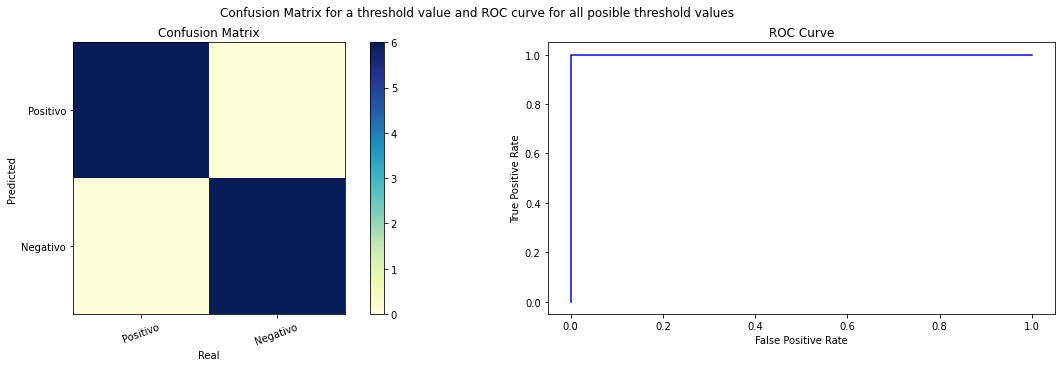

In [205]:
#@markdown marca para reiniciar el algoritmo, luego pusla en "play" y desmarca
reiniciar = True              #@param {type:"boolean"}

#@markdown valores de umbral 
UMBRAL = 0.5    #@param {type:"slider", min:0.3, max:0.6, step:0.01}


class Metricas:
  """
  Esta clase contiene los atributos:
  ROC
  """
  def __init__(self):
    #Predicted Probability:
    self.PP= np.array([[0.57142857],[0.53571429],[0.53571429],[0.57142857],[0.57142857],[0.53571429],[0.39285714],[0.39285714],[0.39285714],[0.39285714],[0.39285714],[0.46428571]])
    self.Etqt=np.array([1.,1.,1.,1.,1.,1.,0.,0.,0.,0.,0.,0.])
  def Prediction(self,Umb):
    self.Umb=Umb
    self.PaT=[]
    for i in self.PP :
      self.PaT= np.append(self.PaT, (1 if i > self.Umb else 0)) 
    return self.PaT
  def PredTresh(self):
    self.PaT1=self.PaT[0:6]
    self.PaT2=self.PaT[6:12]
    return self.PaT1, self.PaT2
  def Etiquetas(self):
    self.Etqt1=self.Etqt[0:6]
    self.Etqt2=self.Etqt[6:12]
    return self.Etqt1, self.Etqt2
  def VdPos(self):
    self.AAA=[]
    for i in range (0,6,1):
      self.AAA=np.append(self.AAA,(self.Etqt1[i],self.PaT1[i]))
    self.AAA.shape=(6,2)
    self.VP=[]
    for i in self.AAA :
      self.VP=np.append(self.VP,(1 if i[0]==i[1] else 0 ))
      self.VPsum=np.sum(self.VP)
    return self.VPsum
  def VdNeg(self):
    self.BBB=[]
    for i in range (0,6,1):
      self.BBB=np.append(self.BBB,(self.Etqt2[i],self.PaT2[i]))
    self.BBB.shape=(6,2)
    self.VN=[]
    for i in self.BBB :
      self.VN=np.append(self.VN,(1 if i[0]==i[1] else 0 ))
    self.VNsum=np.sum(self.VN)
    return self.VNsum
  def FlsPos(self):
    self.FP=[]
    for i in self.BBB:
      self.FP=np.append(self.FP,(0 if i[0]==i[1] else 1 ))
    self.FPsum=np.sum(self.FP)
    return self.FPsum
  def FlsNeg(self):
    self.FN=[]
    for i in self.AAA:
      self.FN=np.append(self.FN, (0 if i[0]==i[1] else 1 ))
    self.FNsum=np.sum(self.FN)
    return self.FNsum
MTR=Metricas()
PRD=MTR.Prediction(UMBRAL)
PRDTRS=MTR.PredTresh()
ETQT=MTR.Etiquetas()
VP=MTR.VdPos()
VN=MTR.VdNeg()
FP=MTR.FlsPos()
FN=MTR.FlsNeg()

A=np.array([[VP, FP],[FN, VN]])



VPR=VP/(VP+FN) 

FPR=FP/(FP+VN)
FPR, VPR


import matplotlib.pyplot as plt
import pandas as pd
class Plot:
  def __init__(self):
    pass
  def MatrizConfusion(self):
    A=np.array([[VP, FP],[FN, VN]])

    df = pd.DataFrame(A,
                  columns=['Positivo', 'Negativo'],
                  index=['Positivo', 'Negativo']
                  )
    MC=plt.imshow(df, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Real')
    plt.colorbar()
    plt.xticks(range(len(df)),df.columns, rotation=20)
    plt.yticks(range(len(df)),df.index)
    #plt.show()
    return MC

  def ROC(self):
    X=np.array([1,1,1,1,0.16,0.16,0.16,0.16,0,0,0,0,0])
    Y=np.array([1,1,1,1,1,1,1,1,1,1,1,0.5,0])
    plt.title('ROC Curve')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    ROC=plt.plot(X,Y, color='blue')
    return ROC

pt=Plot()
MC=pt.MatrizConfusion
ROC=pt.ROC

fig=plt.figure(figsize=(20,5))

ax_1=fig.add_subplot(121)
MC()

ax_2=fig.add_subplot(122)
ROC()


fig.suptitle("Confusion Matrix for a threshold value and ROC curve for all posible threshold values ")

plt.show()

Text(0.5, 0, 'X')

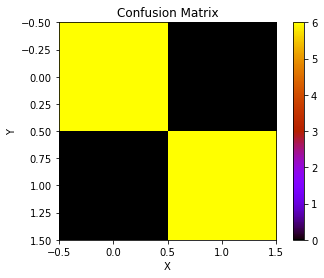

In [206]:
plt.imshow(A, cmap='gnuplot',vmin=0, vmax=6)
plt.colorbar()
plt.title('Confusion Matrix')
plt.ylabel('Y')
plt.xlabel('X')

#plt.xticks(np.arange(2, 0, 1), np.arange(2, 0, 1))
#plt.yticks(np.arange(2, 0, 1), np.arange(2, 0, 1))

In [211]:
class MetrClase:
  """
  Precisión
  Exhaustividad
  F1 Score
  F1 Ponderado

  """
  def __init__(self):
    self.Prec=VP/(VP+FP)
    self.Exh= VP/(VP+FN)
  def Precision(self):
    return self.Prec
  def Exhaustividad(self):
    return self.Exh
  def F1Score(self):
    self.F1=2*((self.Prec*self.Exh)/(self.Prec+self.Exh))
    return self.F1
  def F1Pond(self,beta):
    self.beta=beta
    self.Fb=(1+(self.beta**2))*((self.Prec*self.Exh)/(((self.beta**2)*self.Prec)+self.Exh))
    return self.Fb


#@markdown marca para reiniciar el algoritmo, luego pusla en "play" y desmarca
reiniciar = True              #@param {type:"boolean"}

#@markdown valores del Parametro Beta que da mayor importancia a la precisión 
BETA = 0.58    #@param {type:"slider", min:0.0, max:1, step:0.01}

MtrCls=MetrClase()
Prec=MtrCls.Precision()
Exh=MtrCls.Exhaustividad()
F1=MtrCls.F1Score()
Fb=MtrCls.F1Pond(BETA)

In [212]:
F1,Fb

(1.0, 1.0)

In [213]:
PRDTRS # Predicción de acuerdo al umbral

(array([1., 1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0., 0.]))

In [215]:
ETQT # Etiquetas

(array([1., 1., 1., 1., 1., 1.]), array([0., 0., 0., 0., 0., 0.]))